In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import subprocess

In [2]:
page = 100
# frame = 10
# method = "custom"
# program = "sort"

In [3]:
# ret = subprocess.run(["./virtmem", str(page), str(frame), method, program], universal_newlines=True, stdout=subprocess.PIPE)

In [4]:
# ret.stdout

In [5]:
# m = re.findall("([0-9]+)", ret.stdout)

In [6]:
programs = ["sort", "scan", "focus"]
methods = ["rand", "fifo", "custom"]
df = pd.DataFrame(columns=['program', 'method', 'page', 'frame', 'page_faluts', 'disk_reads', 'disk_writes'])

In [7]:
for program in programs:
    for method in methods:
        for frame in range(10,101):
            ret = subprocess.run(["./virtmem", str(page), str(frame), method, program], universal_newlines=True, stdout=subprocess.PIPE)
            m = re.findall("([0-9]+)", ret.stdout)
            df.loc[len(df)] = [program, method, page, frame, int(m[1]), int(m[2]), int(m[3])]


for program in programs:
#     for method in methods:
    df2 = df[df["program"] == program]
    df2 = df2[df2["method"] == method].set_index('frame')
#         df2 = pd.DataFrame(df2, columns=['frame', 'page_faluts', 'disk_reads', 'disk_writes'], index=['frame'])
#         print(df2)
#         df2 = df2.cumsum().set_index('frame')
#         plt.xticks(df2['frame'], df2.index.values)
    fig = plt.figure();
    df2.plot();
    plt.title(program + " - " + method)

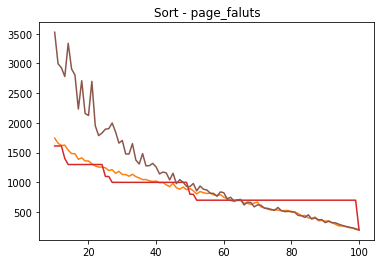

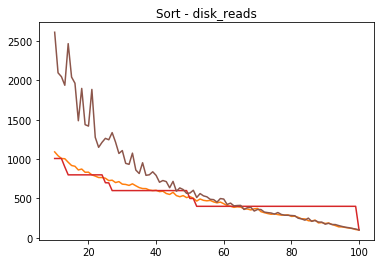

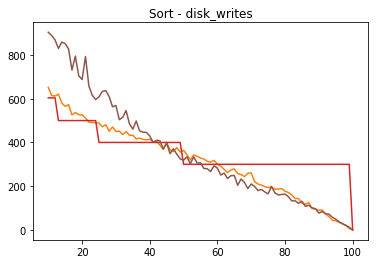

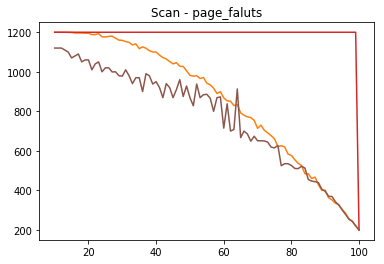

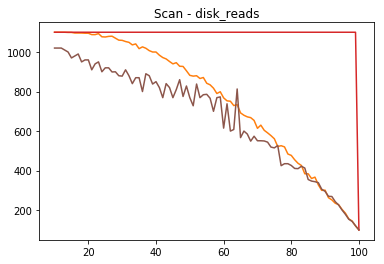

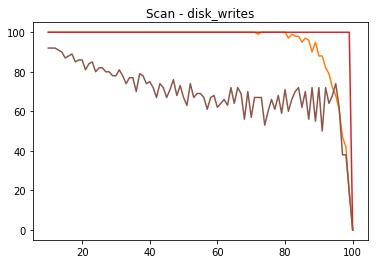

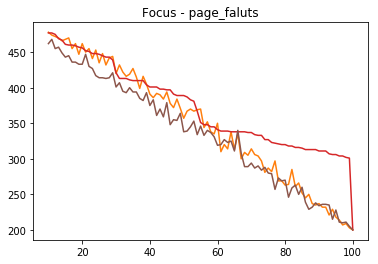

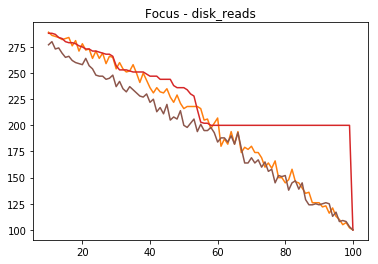

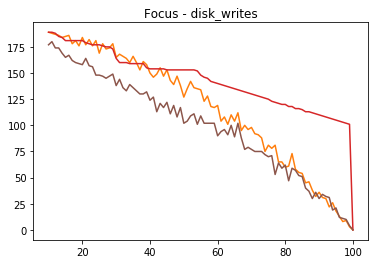

In [8]:
for program in programs:
    for column in ['page_faluts', 'disk_reads', 'disk_writes']:
        for method in methods:
            df2 = df[df["program"] == program]
            df2 = df2[df2["method"] == method].set_index('frame')
            df2 = pd.DataFrame(df2, columns=['frame', column])
    #         df2 = pd.pivot_table(df2, index=("method"), margins=True)
        #         print(df2)
        #         df2 = df2.cumsum().set_index('frame')
        #         plt.xticks(df2['frame'], df2.index.values)
    #         print(df2)
#             fig = plt.figure();
            plt.plot(df2, label=method)
        plt.title(program.capitalize() + " - " + column)
        plt.show();